In [1]:
from qiskit import *

In [33]:
secretnumber = '1110100101'

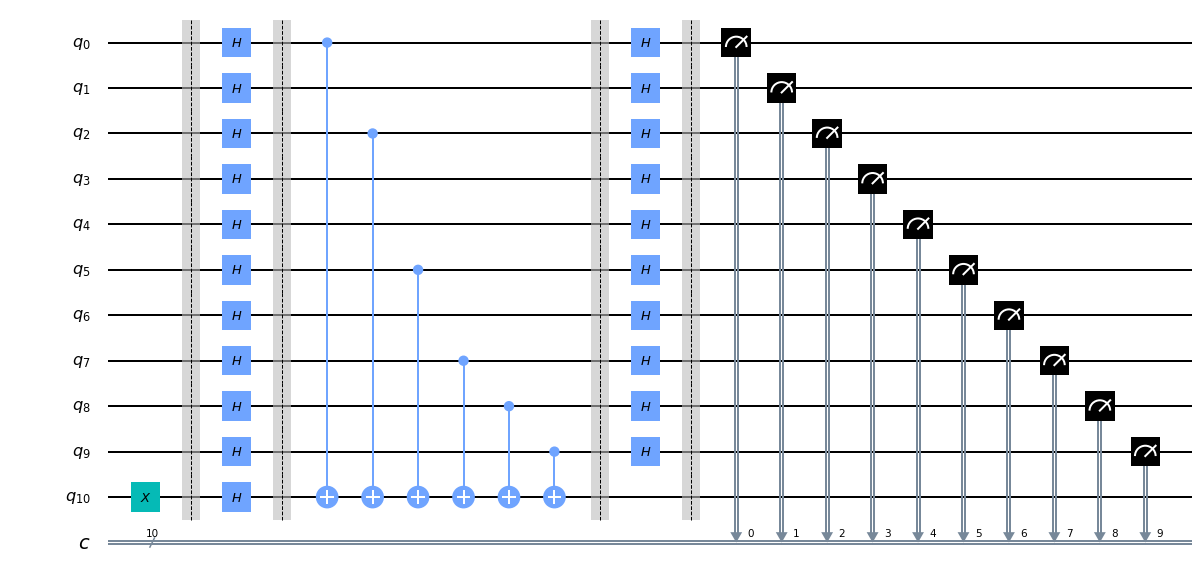

In [34]:
# step 0 creating appropriate circuit and applying gates
# creating a circuit with len+1 qubits and len cbits
circuit = QuantumCircuit(len(secretnumber) + 1, len(secretnumber))
circuit.x(len(secretnumber))
circuit.barrier()
# applying hadamard gate to every qbit except the last one
circuit.h(range(len(secretnumber)))
# now applying x gate and then h to last qbit
circuit.h(len(secretnumber))
circuit.barrier() # just a visual aid
# step 1 getting info of ones and where and applying CNOT gates depending on that
for i, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(i, len(secretnumber))
circuit.barrier()  
# step 2 applying hadamard gates again
circuit.h(range(len(secretnumber)))
circuit.barrier()
# step 3 measuring the qbits
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))
# step 4 presenting it
%matplotlib inline
circuit.draw(output='mpl')

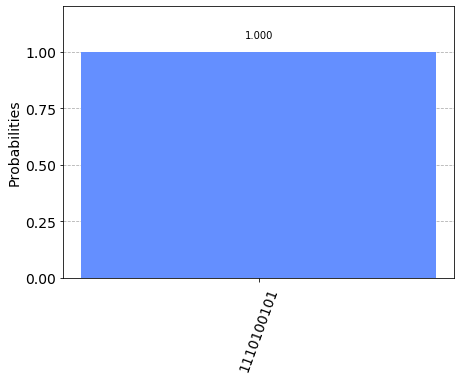

In [36]:
# using a simulator to simulate QC
simulator = Aer.get_backend('qasm_simulator')
# getting results
result = execute(circuit, backend=simulator, shots=1001).result()
visualization.plot_histogram(result.get_counts())